In [1]:
%matplotlib inline

from __future__ import division
from os import listdir
from os.path import isfile, join
import numpy as np
import menpo.io as mio
from menpo.image import Image
from menpo.feature import greyscale, normalize_norm, normalize_std, fast_dsift
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images, print_dynamic, progress_bar_str
from menpofit.visualize import visualize_fitting_results, plot_ced
from alaborticcv2015.alignment import LKFitter, FilteredSSD, FilteredFourierSSD

# Multipie experiment: Load Results

In [2]:
project_path = '/data/PhD/alaborticcv2015/'
results_path = 'results/multipie/'
path = project_path + results_path

file_names = [f for f in listdir(path) if isfile(join(path,f))]

In [4]:
results = []
errors = []
for j, file_name in enumerate(file_names):
    print_dynamic('{}{}'.format(file_name, progress_bar_str(j/len(file_names), show_bar=True)))
    
    # load results 
    rs = mio.import_pickle(path + file_name)
    # undo list nesting
    rs = [fr for fitting_results in rs for frs in fitting_results for fr in frs]
    results.append(rs)
    # compute final errors
    e = [fr.final_error() for fr in rs]
    errors.append(e)
    
print_dynamic('{Done!')

{Done!

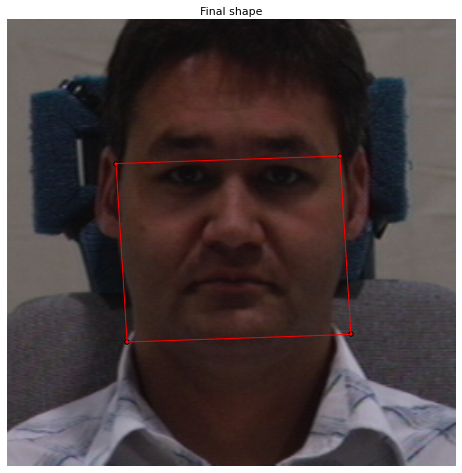

In [5]:
visualize_fitting_results(results[0])

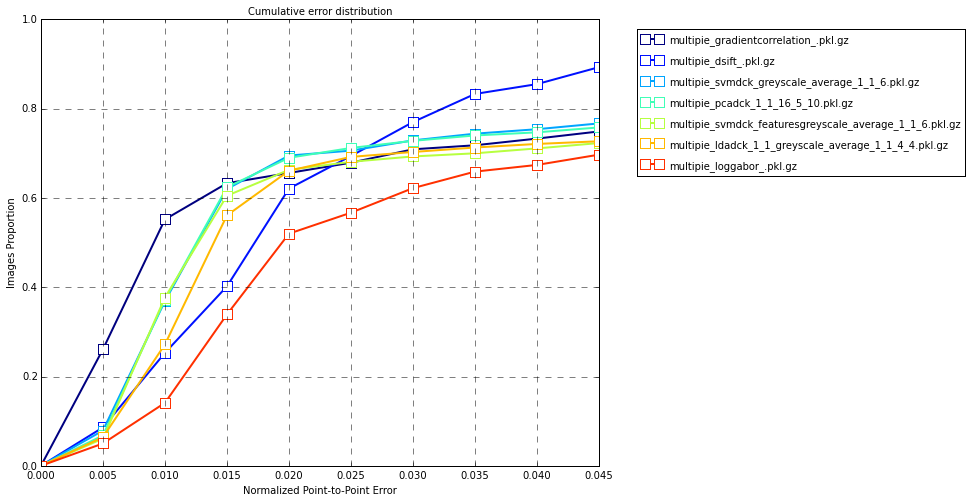

In [6]:
plot_ced(errors, legend_entries=file_names)